In [ ]:
# === PART 1: SETUP AND INSTALLATION (IN A CLEAN DIRECTORY) ===
import os
os.chdir('/content/')

print("✅ 1. Cloning the OFFICIAL YOLOv7 repository into '/content/yolov7'...")
!git clone https://github.com/WongKinYiu/yolov7.git

print("\n✅ 2. Installing compatible libraries...")
!pip install numpy matplotlib opencv-python-headless torch torchvision torchaudio Pillow pyyaml requests scipy tqdm pandas seaborn

print("\n✅ 3. Downloading official pre-trained weights to '/content/yolov7'...")
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt -O /content/yolov7/yolov7.pt

print("\n✅ 4. Applying fix for new PyTorch version using an absolute path...")
!sed -i "s/torch.load(weights, map_location=device)/torch.load(weights, map_location=device, weights_only=False)/" /content/yolov7/train.py


# === PART 2: GETTING THE DATA ===
print("\n⏳ 5. Please upload your 'archive.zip' file now...")
from google.colab import files
uploaded = files.upload()

print("\n✅ 6. Unzipping the dataset into the '/content/' directory...")
zip_file_name = list(uploaded.keys())[0]
!unzip -o "{zip_file_name}" -d /content/


# === PART 3: CONFIGURATION AND TRAINING (WITH CORRECTED CLASS NUMBER) ===
print("\n✅ 7. Creating the final YAML file with corrected class count...")
# THIS SECTION IS NOW CORRECTED
yaml_content = """
train: /content/axial_t1wce_2_class/images/train
val: /content/axial_t1wce_2_class/images/test

# CORRECTED: The number of classes is 2 (e.g., tumor and no-tumor)
nc: 2
names: ['negative', 'positive']
"""
with open('/content/yolov7/brain-tumor.yaml', 'w') as f:
    f.write(yaml_content)

print("\n🚀 8. STARTING THE TRAINING PROCESS...")
os.chdir('/content/yolov7')
!python train.py --weights yolov7.pt --data brain-tumor.yaml --workers 1 --batch-size 4 --epochs 50 --img 640 --device 0


# === PART 4: TESTING THE MODEL ===
print("\n\n🎉 9. TRAINING COMPLETE!")
print("Your best model is saved in '/content/yolov7/runs/train/exp/weights/best.pt'")

print("\n🔎 10. Running detection on a sample image to prove it works...")
import glob
latest_exp_folder = sorted(glob.glob('runs/train/exp*'))[-1]
best_weights_path = os.path.join(latest_exp_folder, 'weights/best.pt')
sample_image = glob.glob('/content/axial_t1wce_2_class/images/test/*.jpg')[0]

!python detect.py --weights "{best_weights_path}" --source "{sample_image}"

print(f"\n✅ 11. Detection complete! Result saved in 'runs/detect/exp'. Displaying result:")
from IPython.display import Image, display
latest_detect_folder = sorted(glob.glob('runs/detect/exp*'))[-1]
result_image_path = os.path.join(latest_detect_folder, os.path.basename(sample_image))
display(Image(filename=result_image_path))

✅ 1. Cloning the OFFICIAL YOLOv7 repository into '/content/yolov7'...
Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 25.60 MiB/s, done.
Resolving deltas: 100% (511/511), done.

✅ 2. Installing compatible libraries...

✅ 3. Downloading official pre-trained weights to '/content/yolov7'...
--2025-10-03 21:26:43--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-03T22%3A18%3A08Z&rscd=attachment%3B+filename%3Dyolov7.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab194

Saving archive.zip to archive.zip

✅ 6. Unzipping the dataset into the '/content/' directory...
Archive:  archive.zip
  inflating: /content/axial_t1wce_2_class/axial_t1wce_2_class.yaml  
  inflating: /content/axial_t1wce_2_class/images/test/00018_101.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00018_109.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00018_111.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00018_117.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00018_121.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00018_126.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00018_134.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00019_66.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00019_75.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00019_84.jpg  
  inflating: /content/axial_t1wce_2_class/images/test/00019_85.jpg  
  inflating: /content/axial_t1wce_2_class/image

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp/00045_118.jpg'

✅ Applying the PyTorch compatibility fix to the detection script...

🔎 Re-running detection on a sample image with your trained model...
Namespace(weights=['runs/train/exp/weights/best.pt'], source='/content/axial_t1wce_2_class/images/test/00045_118.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.8.0+cu126 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36485311 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. 

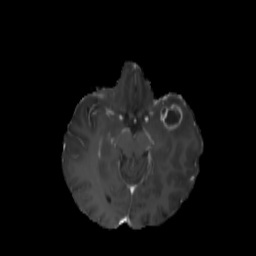

In [ ]:
# === STEP 1: APPLY THE FIX TO THE DETECTION SCRIPT ===
print("✅ Applying the PyTorch compatibility fix to the detection script...")
# This patches the model loading function used by detect.py
!sed -i "s/ckpt = torch.load(w, map_location=map_location)/ckpt = torch.load(w, map_location=map_location, weights_only=False)/" models/experimental.py


# === STEP 2: RE-RUN ONLY THE DETECTION PART ===
print("\n🔎 Re-running detection on a sample image with your trained model...")
import os
import glob
from IPython.display import Image, display

# Find the latest training folder to get the path to your best model
latest_exp_folder = sorted(glob.glob('runs/train/exp*'))[-1]
best_weights_path = os.path.join(latest_exp_folder, 'weights/best.pt')

# Find a sample image to test on
sample_image = glob.glob('/content/axial_t1wce_2_class/images/test/*.jpg')[0]

# Run detection using your trained model
!python detect.py --weights "{best_weights_path}" --source "{sample_image}"

print(f"\n✅ Detection complete! Displaying the final result:")
# Find the latest detection folder
latest_detect_folder = sorted(glob.glob('runs/detect/exp*'))[-1]
result_image_path = os.path.join(latest_detect_folder, os.path.basename(sample_image))
display(Image(filename=result_image_path))

In [ ]:
!zip -r /content/yolov7.zip /content/yolov7

  adding: content/yolov7/ (stored 0%)
  adding: content/yolov7/traced_model.pt (deflated 17%)
  adding: content/yolov7/deploy/ (stored 0%)
  adding: content/yolov7/deploy/triton-inference-server/ (stored 0%)
  adding: content/yolov7/deploy/triton-inference-server/render.py (deflated 73%)
  adding: content/yolov7/deploy/triton-inference-server/data/ (stored 0%)
  adding: content/yolov7/deploy/triton-inference-server/data/dog.jpg (deflated 3%)
  adding: content/yolov7/deploy/triton-inference-server/data/dog_result.jpg (deflated 1%)
  adding: content/yolov7/deploy/triton-inference-server/labels.py (deflated 52%)
  adding: content/yolov7/deploy/triton-inference-server/client.py (deflated 81%)
  adding: content/yolov7/deploy/triton-inference-server/processing.py (deflated 67%)
  adding: content/yolov7/deploy/triton-inference-server/README.md (deflated 60%)
  adding: content/yolov7/deploy/triton-inference-server/boundingbox.py (deflated 69%)
  adding: content/yolov7/data/ (stored 0%)
  addin